# Thống kê suy luận

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
sns.set()

### Bài tập: Kiểm định giả thuyết

Dữ liệu: Tập dữ liệu bao gồm các điểm của học sinh trong các môn học khác nhau.

In [4]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

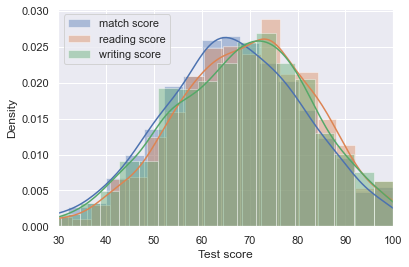

In [6]:
sns.distplot(df['math score'], label='match score')
sns.distplot(df['reading score'], label='reading score')
sns.distplot(df['writing score'], label='writing score')
plt.xlim(30, 100)
plt.xlabel('Test score')
plt.legend();

In [7]:
df.mean()

math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

### BTVN
Kiểm định giả thuyết không có sự khác nhau về điểm trung bình giữa học sinh tham gia và không tham gia bài kiểm tra trước khoá học. Lựa chọn alpha = 0.05.
- Hãy thực hiện theo ít nhất 1 trong những cách sau: sử dụng công thức (nếu được, tham khảo https://en.wikipedia.org/wiki/Student%27s_t-test#Equal_or_unequal_sample_sizes,_unequal_variances_(sX1_%3E_2sX2_or_sX2_%3E_2sX1) và sử dụng thư viện.
- Vẽ phân bố xác suất tương ứng và vị trí của các điểm statistic và critical.

In [8]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

Your code goes here

In [14]:
df['Average score'] = (df['math score'] + df['reading score'] + df['writing score'])/3

In [15]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [21]:
df_completed = df[df['test preparation course']=='completed']['Average score']

In [23]:
len(df_completed)

358

In [24]:
df_none = df[df['test preparation course']=='none']['Average score']

In [25]:
len(df_none)

642

### 1. Kiểm chứng H0
+ H0: Không có sự khác nhau về điểm trung bình học sinh tham gia và không tham gia bài kiểm tra trước khóa
+ H1: Có sự khác nhau về điểm trung bình học sinh tham gia và không tham gia bài kiểm tra trước khóa
+ Mức độ quan trọng alpha = 0.05
+ Lựa chọn t-test để kiểm tra

In [36]:
s_none = np.var(df_none)

In [37]:
s_completed = np.var(df_completed)

In [38]:
s_none/s_completed

1.1856276518566582

#### we have two distribution have same variance
$\frac{{1}}{{2}}<\frac{{S_{none}}}{{S_{completed}}}<2$



#### The t statistic to test whether the means are different can be calculated as follows:

$t=\frac{{\bar{x1}}-{\bar{x2}}}{Sp*{\sqrt {\frac{{1}}{{n1}}+\frac{{1}}{{n2}}}}}$

In [40]:
n1 = len(df_completed)
n2 = len(df_none)

In [41]:
s_p = np.sqrt(((n1-1)*(s_completed**2)+(n2-1)*(s_none**2))/(n1+n2-2))

In [47]:
t_value = (np.mean(df_completed)-np.mean(df_none))/(s_p*np.sqrt(1/n1 + 1/n2))

In [49]:
p_value = stats.t.cdf(t_value, n1+n2-2)*2

In [50]:
p_value

1.4566147157115408

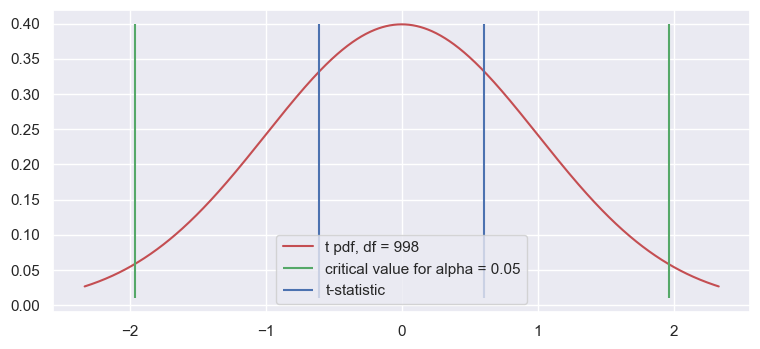

In [51]:
dof = n1+n2-2
alpha = 0.05
x = np.linspace(stats.t.ppf(0.01, df=dof), stats.t.ppf(0.99, df=dof), 1000)
plt.figure(figsize=(9, 4), dpi=100)
plt.plot(x, stats.t.pdf(x, dof), 'r-', label=f't pdf, df = {dof}')
# từ p_value hay critical point muốn tìm ra data value tại xác suất đó dùng hàm stats.t.ppf
plt.vlines(x=[stats.t.ppf(alpha / 2, dof), -stats.t.ppf(alpha / 2, dof)],
           ymin=0.01,
           ymax=0.4,
           label=f'critical value for alpha = {alpha}',
           color='g')
plt.vlines(x=[-t_value, t_value],
           ymin=0.01,
           ymax=0.4,
           label='t-statistic',
           color='b')
plt.legend();

#### => Kết luận: failed to reject H0

### 2. Thử với công thức 
$t=\frac{{\bar{x}}-\mu_{0}}{s/{\sqrt {n}}}$

- $H_0$: Điểm trung bình các học sinh làm bài kiểm tra trước khóa bằng với điểm trung bình các học sinh không làm.
- $H_a$: Điểm trung bình giữa 2 nhóm học sinh khác nhau.
- Mức độ quan trọng $\alpha\$ = 0.05 hoặc 5%.
- Lựa chọn kiểm chứng t-test.

In [52]:
np.mean(df_none)

65.03894080996885

In [53]:
np.mean(df_completed)

72.66945996275605

In [54]:
mu_0 = np.mean(df_none)
n = len(df_completed)
alpha = 0.05

In [56]:
t_value, p_value = stats.ttest_1samp(df_completed, mu_0, alternative='two-sided')

In [58]:
p_value

1.0606585894955554e-24

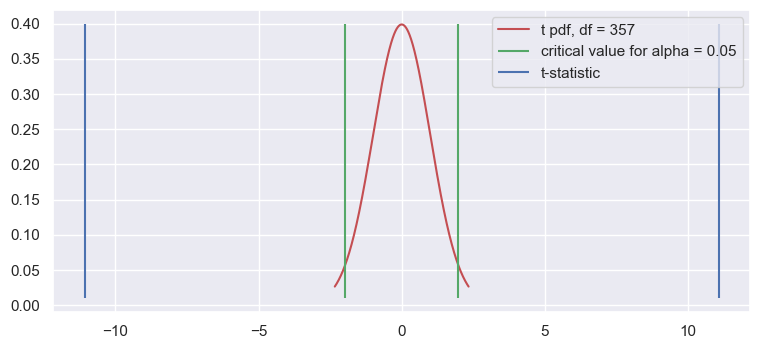

In [59]:
dof = n-1
x = np.linspace(stats.t.ppf(0.01, df=dof), stats.t.ppf(0.99, df=dof), 1000)
plt.figure(figsize=(9, 4), dpi=100)
plt.plot(x, stats.t.pdf(x, dof), 'r-', label=f't pdf, df = {dof}')
# từ p_value hay critical point muốn tìm ra data value tại xác suất đó dùng hàm stats.t.ppf
plt.vlines(x=[stats.t.ppf(alpha / 2, dof), -stats.t.ppf(alpha / 2, dof)],
           ymin=0.01,
           ymax=0.4,
           label=f'critical value for alpha = {alpha}',
           color='g')
plt.vlines(x=[-t_value, t_value],
           ymin=0.01,
           ymax=0.4,
           label='t-statistic',
           color='b')
plt.legend();

#### => Reject H0 